# Classification des Iris

Dans cet exemple, nous allons développer quelques modèles d'apprentissage automatique afin de classifier différentes espèces d'Iris, en particulier l'iris Setosa (iris de l'Alaska), Versicolor (ou clajeux) et Virginica (de Virginie).

Nous allons résoudre ce problème pas-à-pas afin de bien comprendre les différentes étapes mises en oeuvre dans l'apprentissage automatique, ainsi que certaines notions mathématiques associées.

La [base données des Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) fait partie du module Python [Sci-kit learn](https://scikit-learn.org/stable/).

![Iris Versicolor](images/iris_versicolor.png "Iris Versicolor")

La base de données contient 50 échantillons de chacune des espèces d'iris mentionnées précédemment. Quatre caractéristiques ont été mesurées sur chaque échantillon : la longueur et la largeur des pétales et des sépales (en centimètres). Ces caractéristiques peuvent être utilisées pour classifier ou prédire l'espèce de l'iris. 


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

## Chargement des données

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
iris.target_names

In [ ]:
len(iris.data)

In [ ]:
iris.data

In [ ]:
iris.target

## Affichage des longueurs et largeurs des sépales

Text(0.5, 1.0, 'Distribution des dimensions des Sépales')

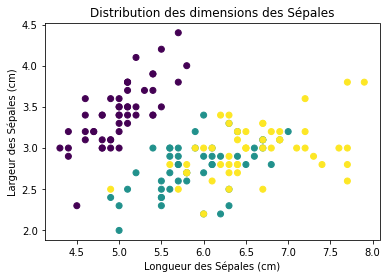

In [41]:
# Enregistrement dans la variable X des longueurs des sépales
# et dans la variable Y des largeurs des sépales
X = iris.data[:, 0]
Y = iris.data[:, 1]

# Les masques contenus dans le tableau iris.target vont être utlisés pour donner une couleur à chaque espèce d'iris
Masque_Couleur = iris.target

plt.scatter(X, Y, c=Masque_Couleur)
plt.xlabel('Longueur des Sépales (cm)')
plt.ylabel('Largeur des Sépales (cm)')
plt.title('Distribution des dimensions des Sépales')

## Affichage des longueurs et largeurs des pétales

In [ ]:
# Code à compléter

## Modèle de Regression Logistique

Nous allons créer un modèle qui va prédire si un échantillon appartient à une des catégories des espèces d'iris ou non.

La structure de ce modèle est la suivante :

![Regression logistique](images/perceptron75.png "Perceptron")

## Function Sigmoïde

La [fonction Sigmoïde](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)) est utilisée en regression logistique et dans les neurones artificiels. C'est une manière de transformer des valeurs continues en valeurs binaires. Cette fonction est également appellée "Fonction d'activation" dans les réseaux de neurones. De nombreux types de fonctions d'activations sont utilisés aujourd'hui.

Text(0.5, 1.0, 'Fonction Sigmoïde')

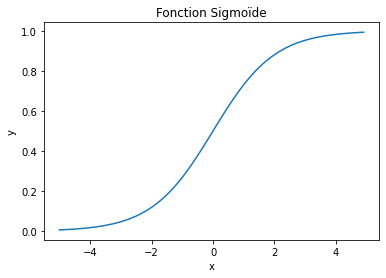

In [40]:
def sigmoid(z):
  return 1.0/(1 + math.exp(-z))

x = [i * 0.1 for i in range(-50, 50)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fonction Sigmoïde')

## Fonction de prédiction

Cette fonction prend un échantillon et multiplie les caractéristiques par les poids, ajoute l'offset et passe la valeur obtenue dans la fonction Sigmoïde.

Cette fonction sera utilisée pour déterminer les poids et l'offset à utliser pendant la phase d'apprentissage, ainsi que pour faire les prédictions une fois l'entrainement du modèle terminé.


In [ ]:
def predict(echantillon):
  result  = 0.0
  for i in range(len(echantillon)):
    result = result + poids[i] * echantillon[i]
    
  result = result + offset
  return sigmoid(result)

## Fonctions de Perte et de Coût (Loss and Cost Functions)

La fonction de perte (Loss function en Anglais) compare la valeur prédite à partir d'un échantillon (la valeur prédite est calculée par la fonction de prédiction) avec la valeur attendue (la valeur qu'on devrait trouver si la fonction de prédiction fonctionnait correctement - ce qui n'est pas le cas au débit de l'apprentissage !).

Si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est grande, la fonction de perte doit retourner une grande valeur. Inversement, si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est faible, la fonction de perte doit retourner une faible valeur.

Pour synthétiser : Plus la fonction de prédiction est mauvaise, plus les pertes sont élevées :


<img src="https://github.com/AlexandreBourrieau/ML-F1/blob/master/Regression/images/chaudFroid.png?raw=1" width="500"/>


La fonction de perte n'est pas juste la valeur absolue de la différence mais est plus élaborée, afin de rendre les calculs plus rapides et l'entrainement du modèle plus simple.

$$\mathcal L(y, \hat y) = -(y \ln \hat y + (1-y) \ln (1 - \hat y))$$

Avec $\mathcal L$ : les pertes ; $y$ : la valeur attendue ; et $\hat y$ la valeur prédite obtenue par le modèle.

In [ ]:
def pertes(y_attendu, y_predit):
  return -(y_attendu * math.log(y_predit) + (1.0 - y_attendu) * math.log(1 - y_predit))

Nous pouvons regarder à quoi ressemble cette fonction pour une valeur attendue fixe (ici 0.9) en fonction des valeurs prédites (ici allant de 0.1 à 1).

On observe bien que les pertes diminuent lorsque la valeur prédite se rapproche la valeur attendue :

Text(0.5, 1.0, 'Pertes en fonction des valeurs prédites pour une valeur attendue de 0.90')

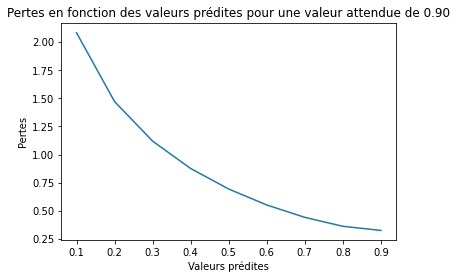

In [51]:
y_attendu = 0.9
x = [i * 0.1 for i in range(1, 10)]
y = [loss(y_attendu, yp) for yp in x]
plt.plot(x, y)
plt.xlabel('Valeurs prédites')
plt.ylabel('Pertes')
plt.title('Pertes en fonction des valeurs prédites pour une valeur attendue de %0.2f' % y_attendu)

La fonction de coût est la valeur moyenne des pertes pour tous les échantillons testés. Ainsi, par exemple si on a testé 10 échantillons avec les résultats suivants alors le coût sera de 0.3 : 

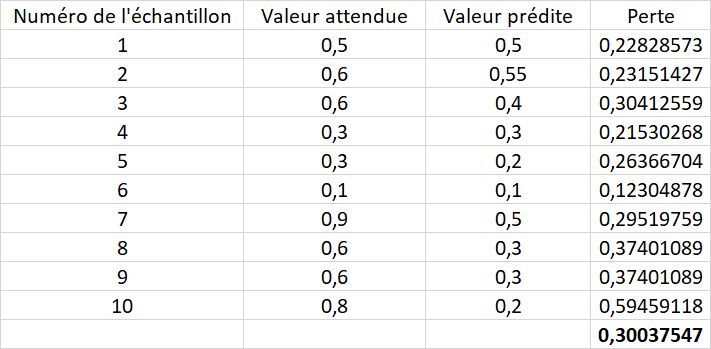

## Gradient Descent

Gradient descent attempts to minimize the cost function by iteratively adjusting weights and biases in the direction of lower cost. This achieved by computing the derivative (gradient) or slope of the cost function for each of the weights and biases.

The general equations are

$$w_{k+1} = w_{k} - \alpha \frac{\partial \mathcal J}{\partial w}$$

$$b_{k+1} = b_{k} - \alpha \frac{\partial \mathcal J}{\partial b}$$

Where $w_{k}$ and $b_{k}$ are the current values of weights and biases, and $w_{k+}$ and $b_{k+1}$ are the next values after one iteration. The number $\alpha$ is the learning rate, which is a tuning parameter or hyperparameter. If the learning rate is too small, it will take longer to train, whereas too large of a training value might result in wild oscillations that never converge on an optimum solution.

To picture how this works, let's consider an example in two dimensions:

$$y = x^2 + \frac{x}{2}$$

Text(0.5, 1.0, 'Simple function')

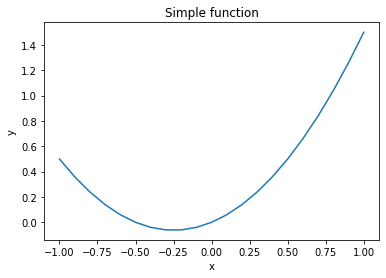

In [ ]:
def parabola(x):
    return x**2 + x/2.0

x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple function')

The first derivative, or the slope at any point $x$ is:

$$\frac{\partial y}{\partial x} = 2x + 0.5$$

To find the minimum, iterate using this equation:

$$x_{k+1} = x_{k} - \alpha \frac{\partial y}{\partial x}$$

Estimated minimum -0.17, -0.06
Derivative (gradient) 0.20


Text(0.5, 1.0, 'Simple function')

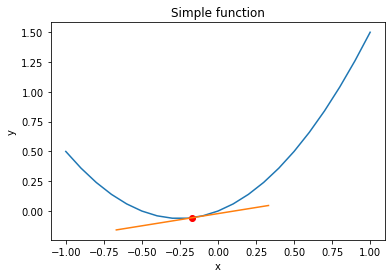

In [ ]:
x_k = 0.0

learning_rate = 0.1

def derivative(x):
  return 2*x + 0.5

for i in range(5):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient

print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)

x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plt.plot(line_x, line_y)
plt.title('Simple function')

## Backpropagation Algorithm

[Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is a widely used algorithm for training machine learning models. It attempts to learn weights and biases by iteratively adjusting these values in order to minimize the loss between predicted and expected output.

In [ ]:
num_features = iris.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0

  global bias, weights

  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

## Training Algorithm

This algorithm with iterate through the training data many times and call the backpropagation function.

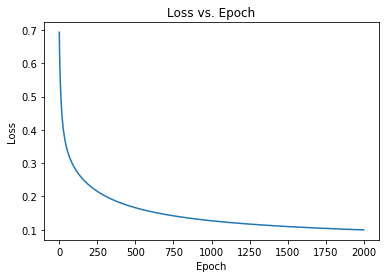

In [ ]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.1

epochs = 2000

x_train_samples = iris.data
y_train_samples = [1 if y == 2 else 0 for y in iris.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

## Make Predictions

Once the model is trained, it can be used to make predictions.

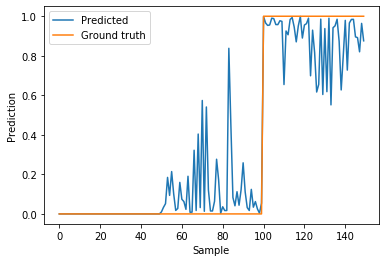

Accuracy: 98.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))